## GAM Analysis

In this notebook we take a detailed look into the fitted GAM models. For this purpose we refit the GAMs to all available data, as this gives as the most stable estimates and is most representative for the average performances observed in the cross-validation experiments.

In [15]:
import data1 as data
x = data.x.filter(data.predictors, axis=1)
sphere = data.sphere.replace(-1, 0)
vesicle = data.vesicle.replace(-1, 0)
worm = data.worm.replace(-1, 0)
x.columns

Index(['clogp_corona', 'mon_corona_mw', 'mon_corona_apol', 'mon_corona_mv',
       'mon_corona_psa', 'dp_corona', 'corona_mw_total', 'corona_mv_total',
       'clogp_core', 'mon_core_mw', 'mon_core_apol', 'mon_core_mv',
       'mon_core_psa', 'dp_core', 'core_mw_total', 'core_mv_total',
       'ratio_mass', 'ratio_vol', 'conc', 'ph', 'salt', 'charged', 'temp'],
      dtype='object')

## Sphere model

In [5]:
from pygam import LogisticGAM

gam_sphere = LogisticGAM(lam=[10.0]*len(x.columns), max_iter=200)
gam_sphere.fit(x, sphere)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=200, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + intercept,
   tol=0.0001, verbose=False)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(sphere, gam_sphere.predict(x))

0.9029605263157895

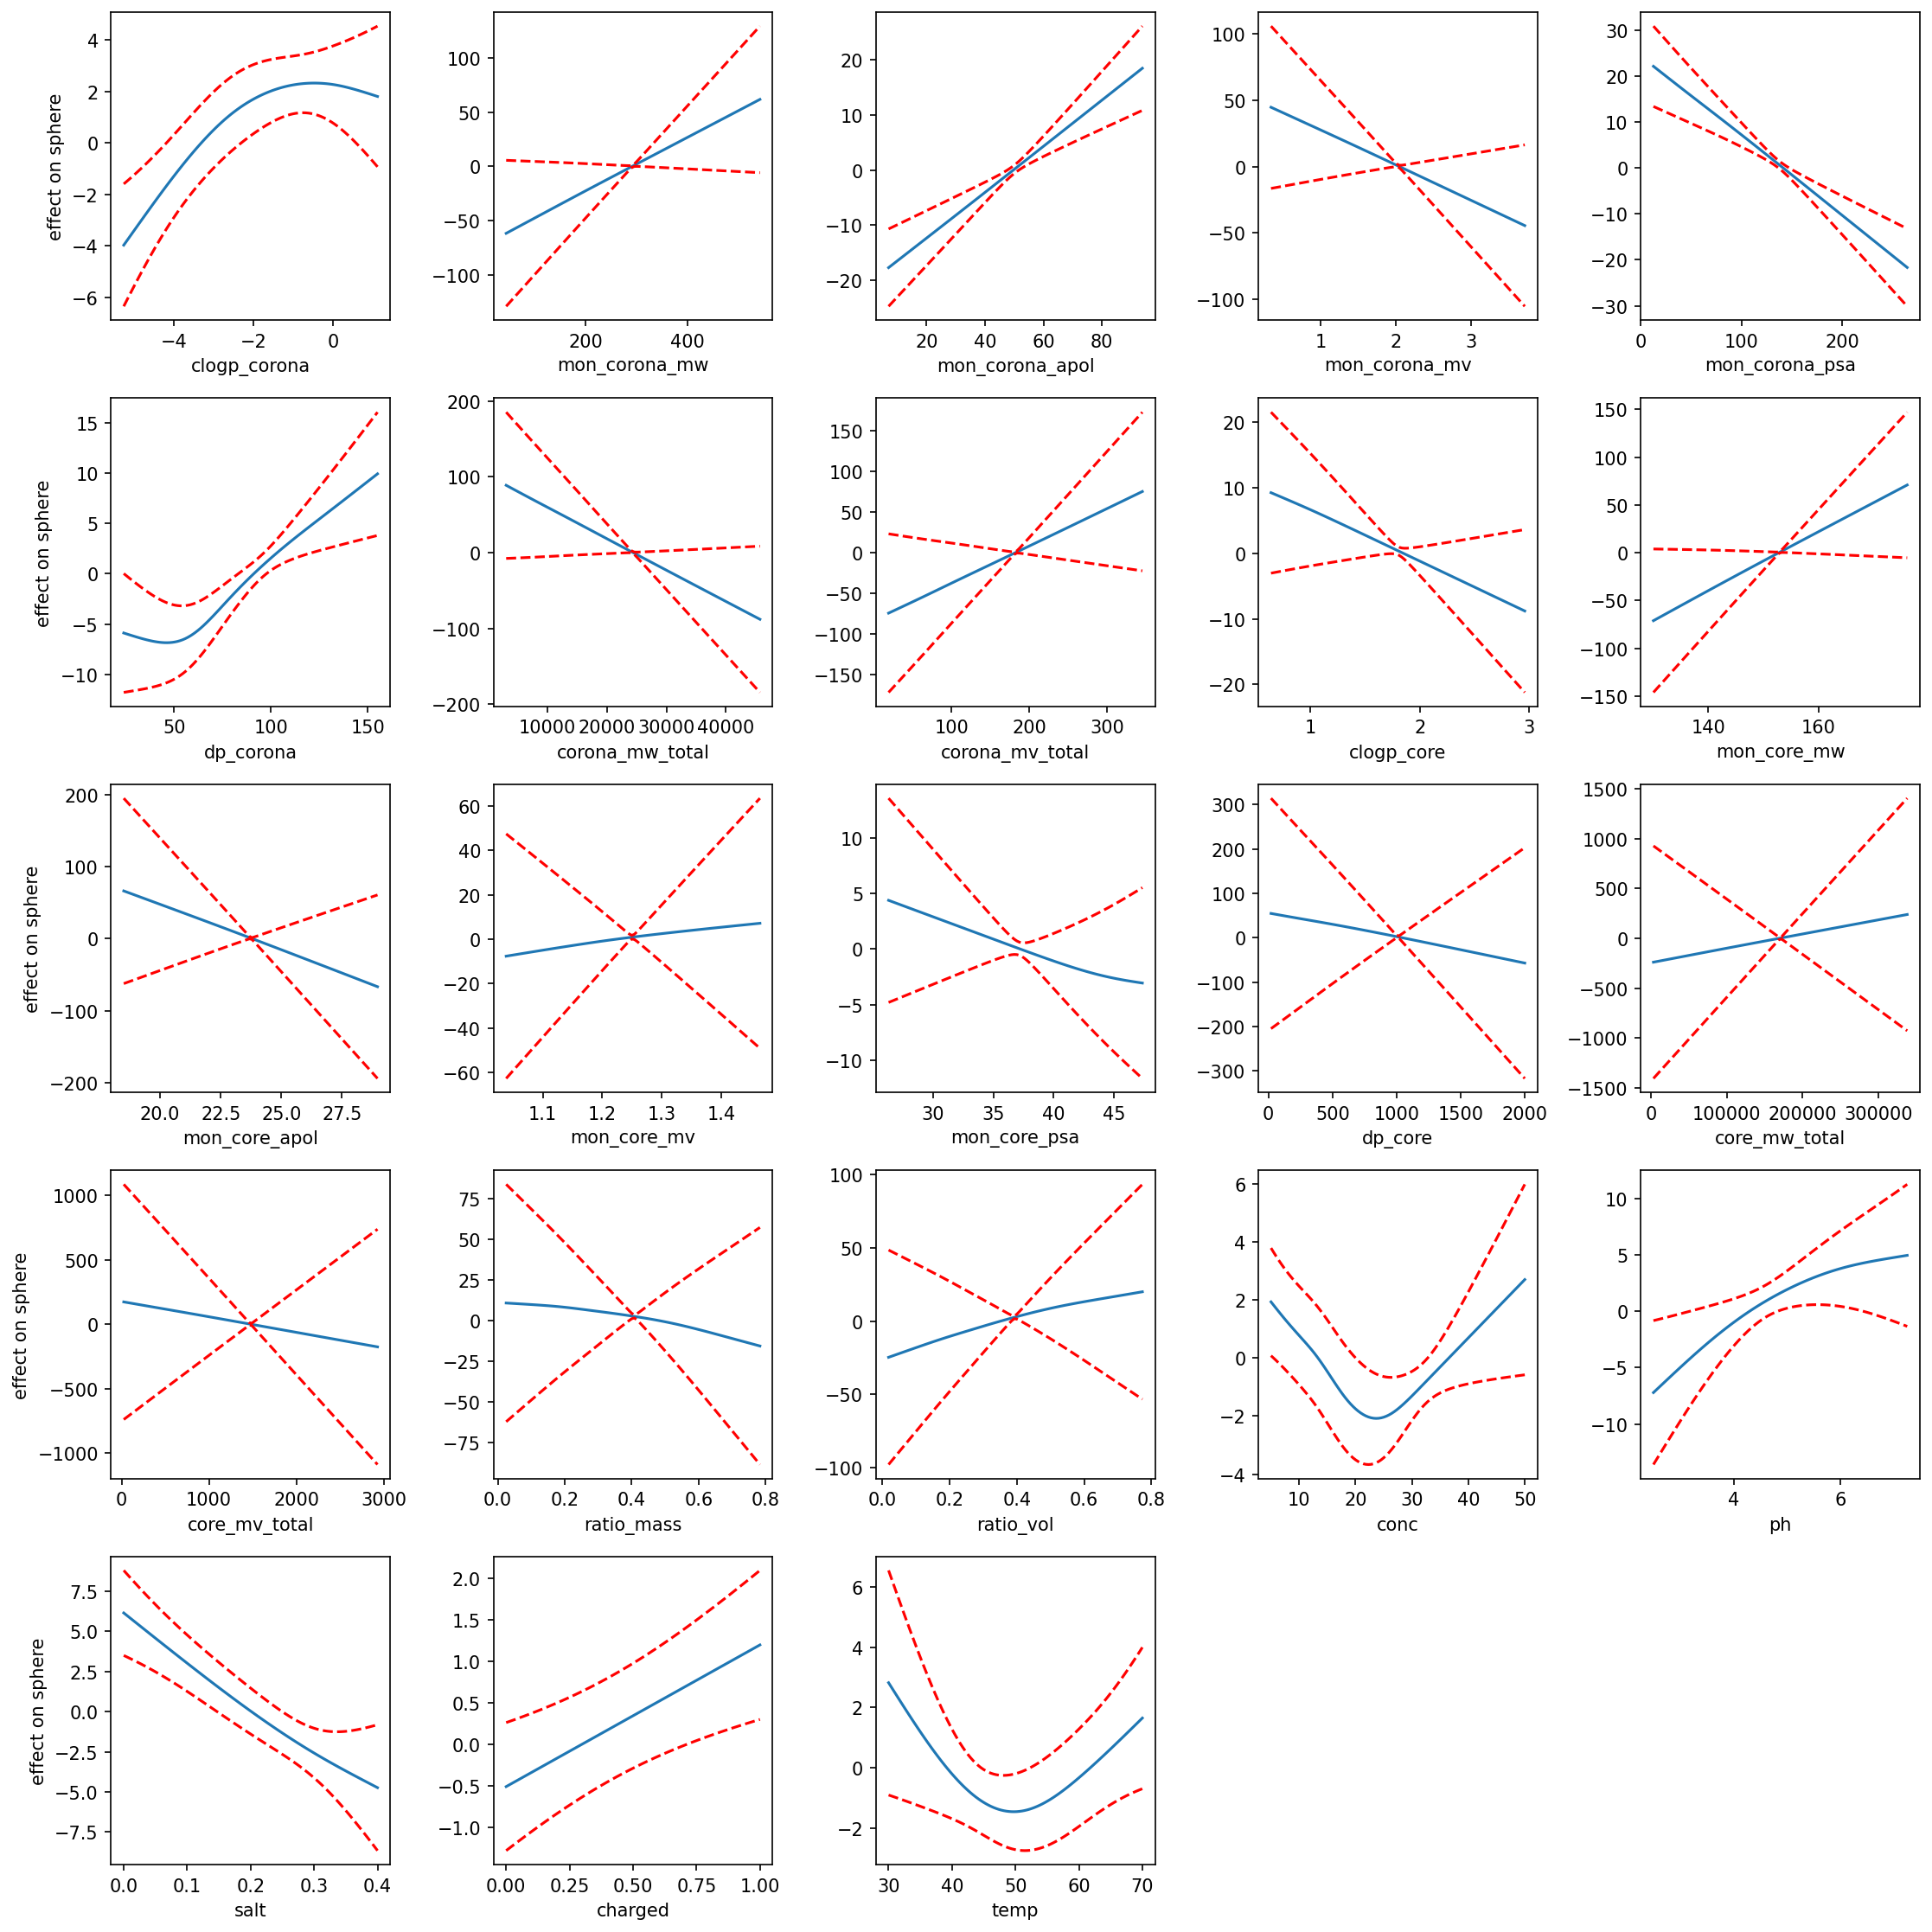

In [13]:
from plotting import plot_gam

plot_gam(gam_sphere, x.columns, 'sphere')

In [16]:
gam_sphere.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     34.9085
Link Function:                        LogitLink Log Likelihood:                                  -157.3961
Number of Samples:                          608 AIC:                                              384.6092
                                                AICc:                                             389.2506
                                                UBRE:                                               2.6785
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.6239
Feature Function                  Lam